# **TIPO DE PERSONALIDADES MBTI**


---




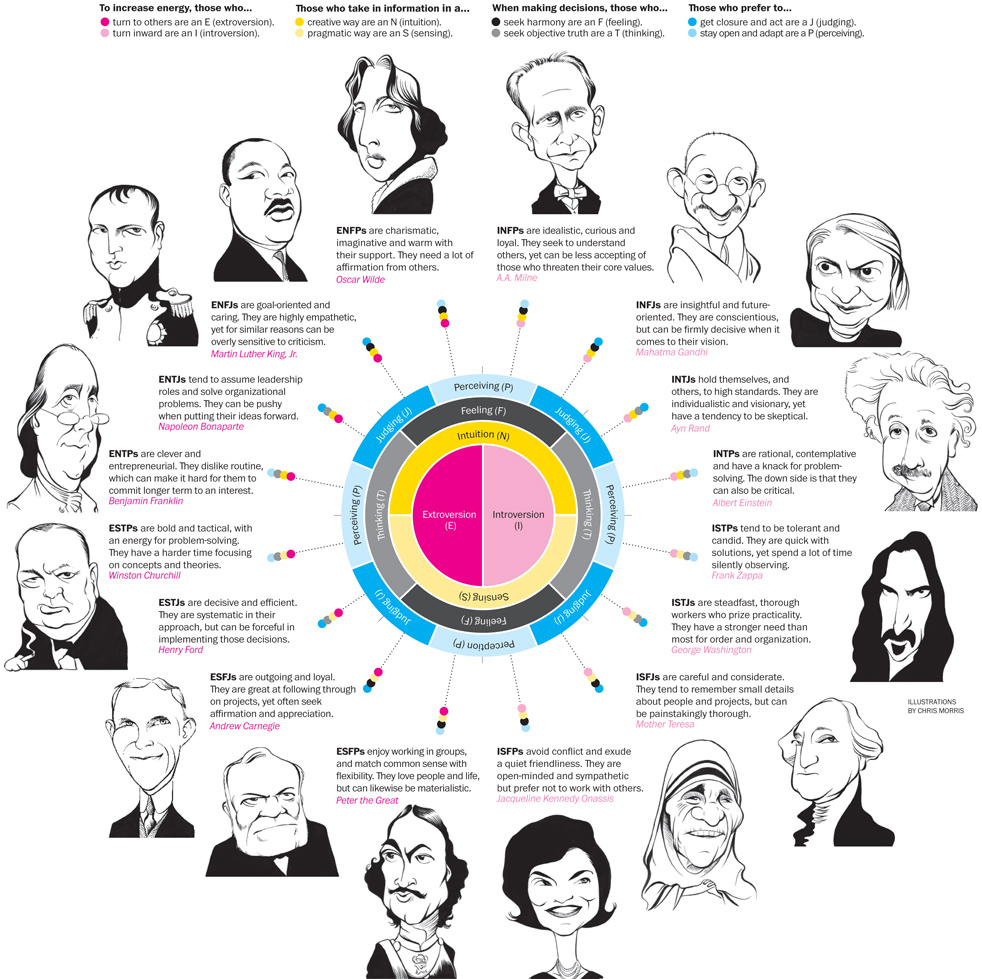

In [3]:
# importaciones
import pandas as pd


In [56]:
from google.colab import drive
drive.mount('/content/drive')
#!pwd
#!ls
# leyendo el dataset
mbti = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')

print()
print("Dataset MBTI preprocesado de tipo de presonalidades")
print()
print(mbti)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dataset MBTI preprocesado de tipo de presonalidades

   personality  count  actually   also  always   come  could   de   det  \
0         ENFJ   1534         0   3437       0   2409      0    0     0   
1         ENFP   6167         0  13704   10250  10208      0    0     0   
2         ENTJ   2955         0   6325       0   4292      0    0     0   
3         ENTP  11725         0  24268       0  16825  17334    0     0   
4         ESFJ    181         0    450     332    314      0    0     0   
5         ESFP    360         0    774       0    585      0    0     0   
6         ESTJ    482         0    926       0      0      0  780  1753   
7         ESTP   1986      2550   4787       0      0   2764    0     0   
8         INFJ  14963         0  33727       0  24270      0    0     0   
9         INFP  12134         0  26719   20017  18875      0    0  

In [54]:
# normalizacion
palabras = ['actually','also','always','come','could','de','det','en','enfj','enfp','entj','entp','er','esfj','esfp','estj','estp','even','fe','feel','fi','find','friend','function','german','germany','get','give','go','good','help','ikke','infj','infp','interest','intj','intp','isfj','isfp','istj','istp','jeg','know','life','like','lol','look','lot','love','make','mean','much','need','og','one','people','person','pretty','really','right','say','se','see','seem','si','someone','something','still','take','talk','thank','thing','think','though','til','time','try','type','u','use','want','way','well','work','would','yeah','year']
print(len(palabras))
mbti = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')
for palabra in palabras:
  mbti[palabra] = mbti[palabra] / mbti['count']

print("Normalización en la cantidad de registros de las frecuencias de las palabras según la personalidad")
print()
print(mbti)



87
Normalización en la cantidad de registros de las frecuencias de las palabras según la personalidad

   personality  count  actually      also    always      come     could  \
0         ENFJ   1534  0.000000  2.240548  0.000000  1.570404  0.000000   
1         ENFP   6167  0.000000  2.222150  1.662072  1.655262  0.000000   
2         ENTJ   2955  0.000000  2.140440  0.000000  1.452453  0.000000   
3         ENTP  11725  0.000000  2.069765  0.000000  1.434968  1.478380   
4         ESFJ    181  0.000000  2.486188  1.834254  1.734807  0.000000   
5         ESFP    360  0.000000  2.150000  0.000000  1.625000  0.000000   
6         ESTJ    482  0.000000  1.921162  0.000000  0.000000  0.000000   
7         ESTP   1986  1.283988  2.410373  0.000000  0.000000  1.391742   
8         INFJ  14963  0.000000  2.254027  0.000000  1.622001  0.000000   
9         INFP  12134  0.000000  2.201994  1.649662  1.555546  0.000000   
10        INTJ  22427  0.000000  2.182592  0.000000  1.498729  1.446560 

Nube de palabras según la personalidad




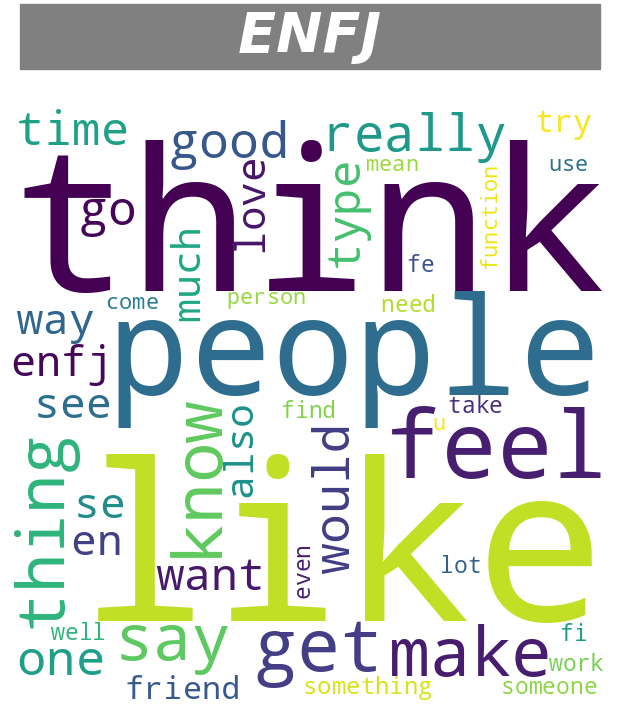

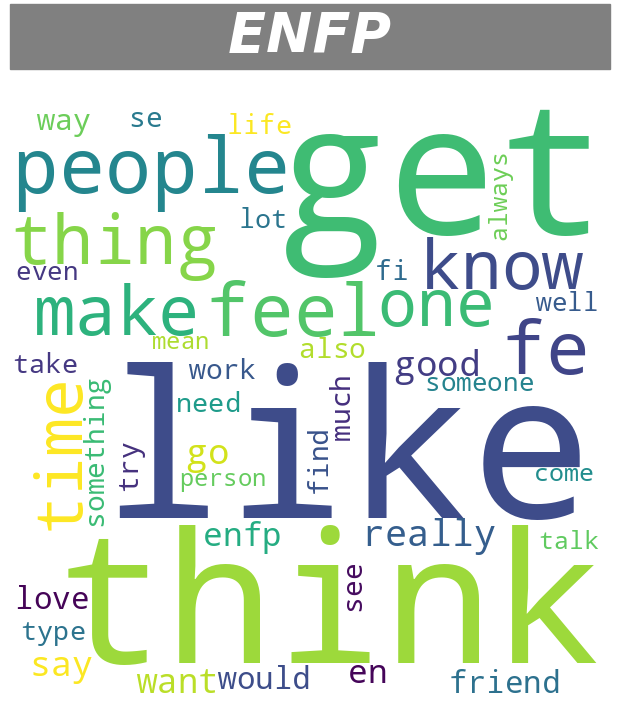

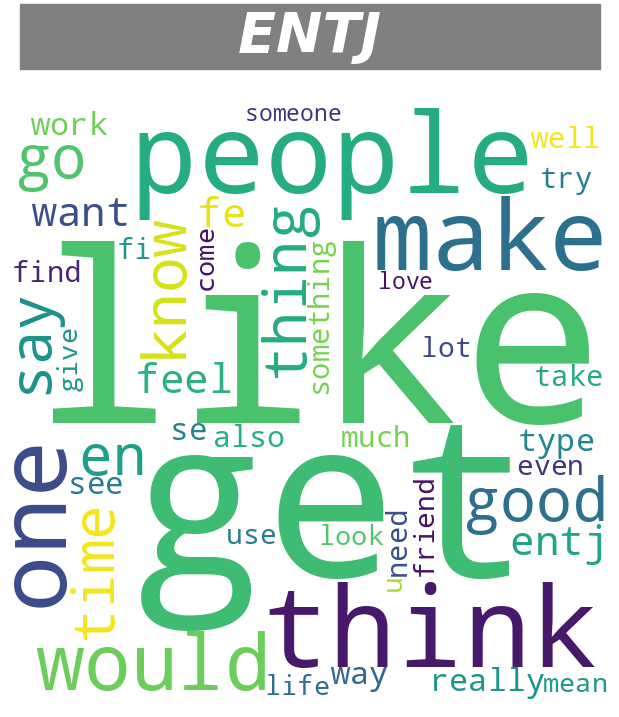

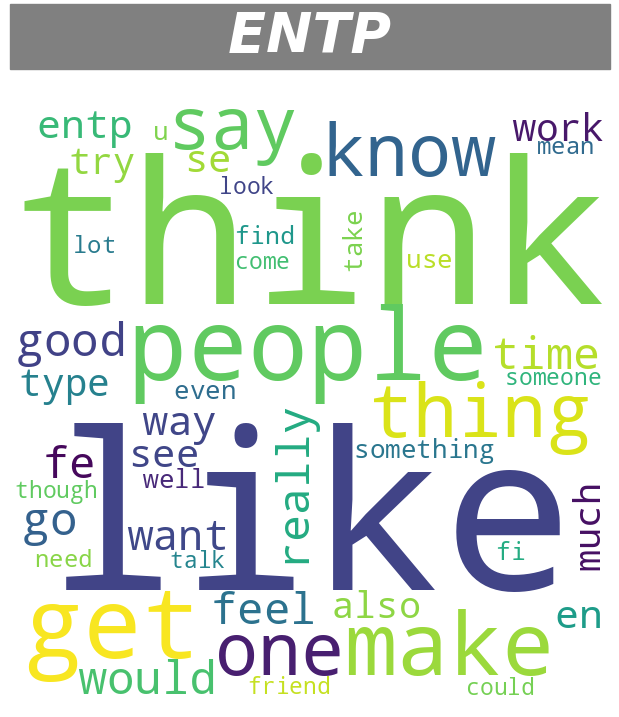

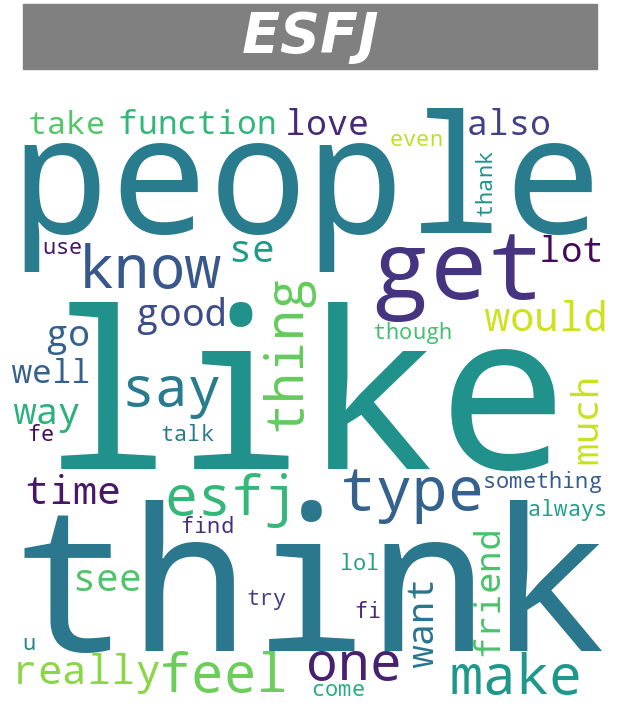

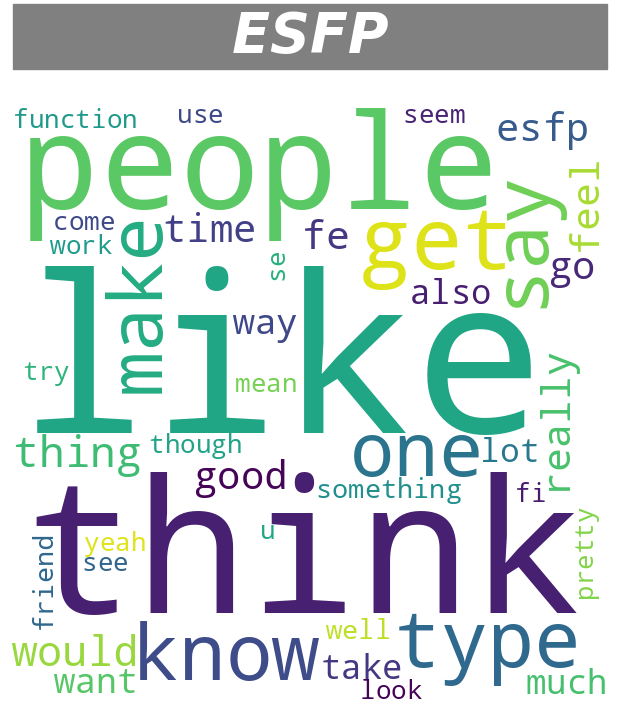

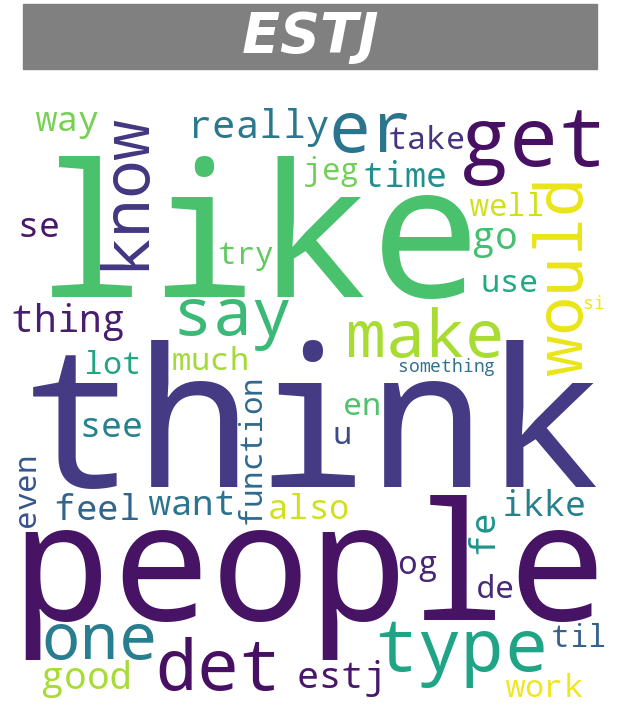

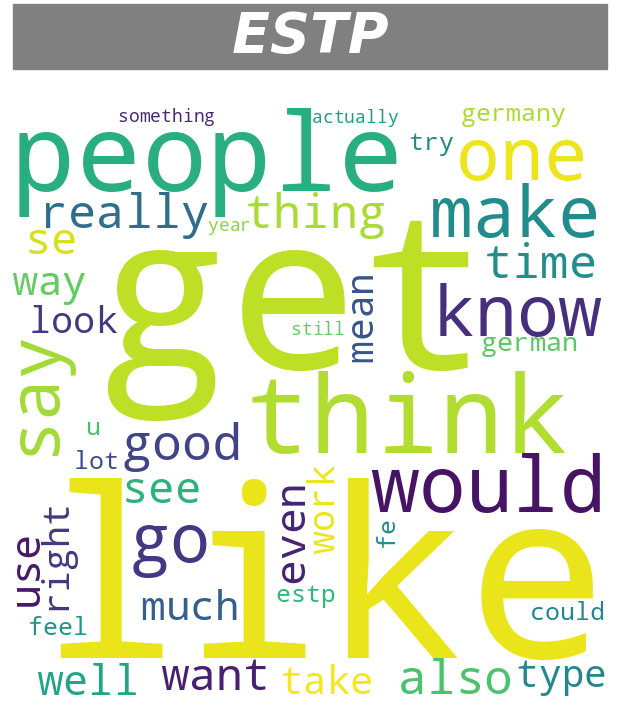

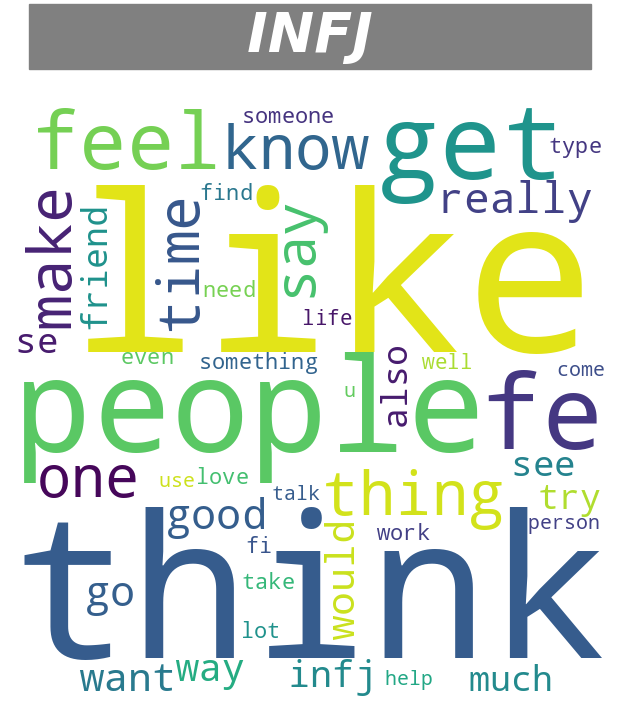

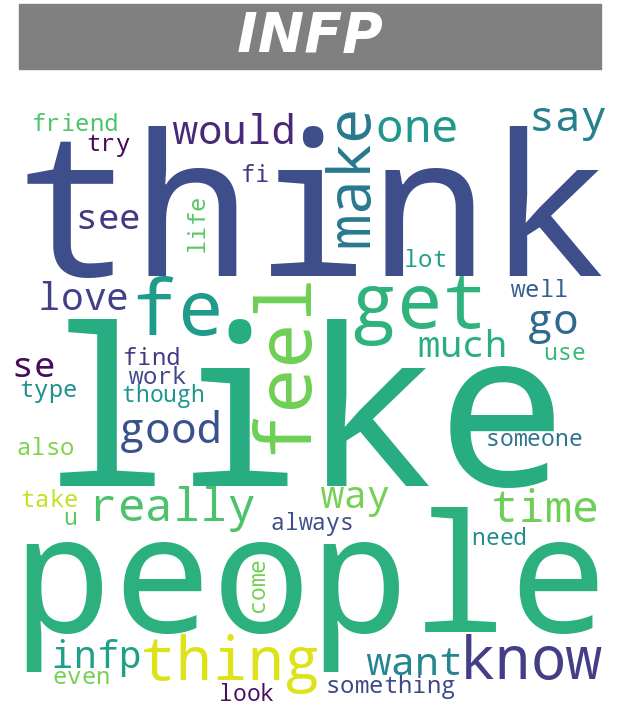

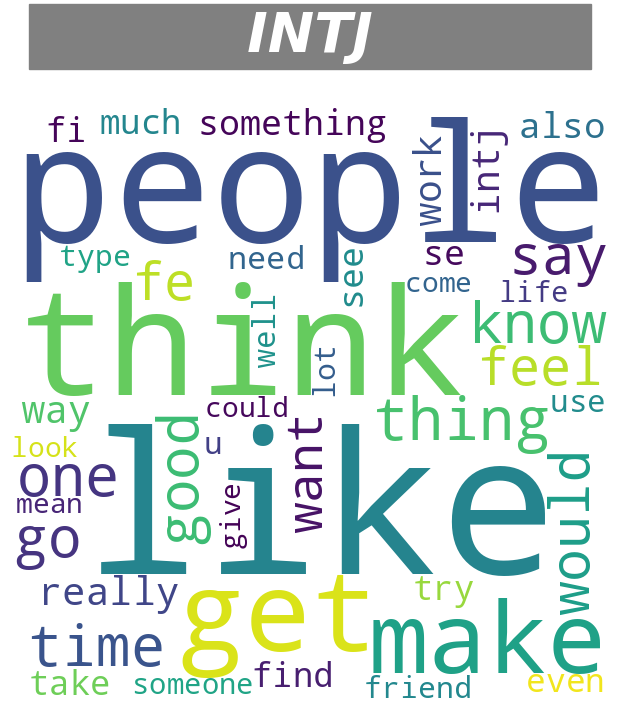

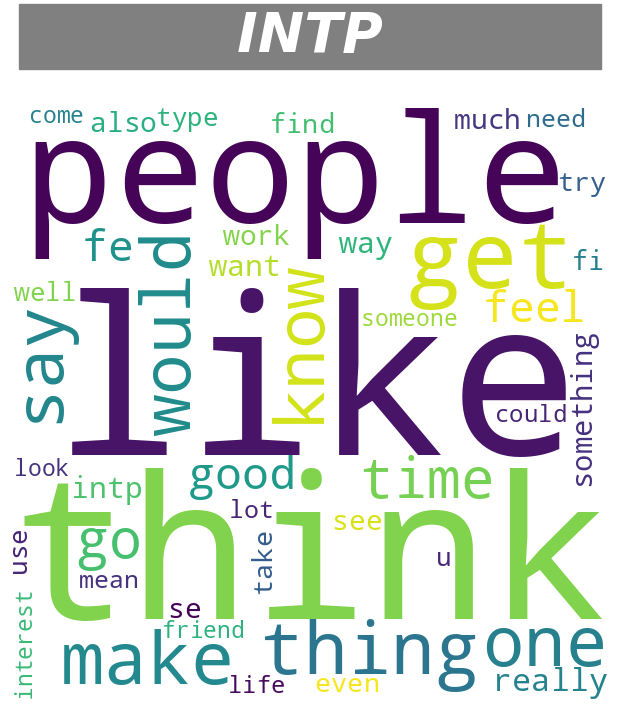

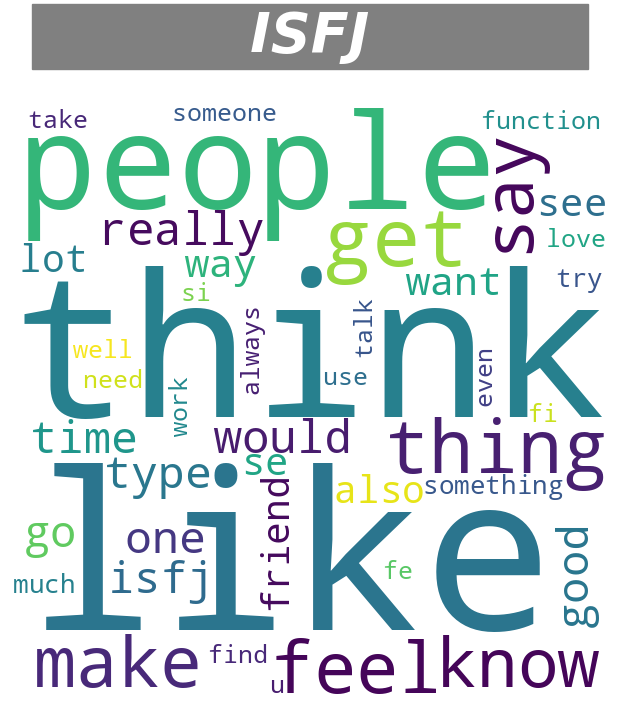

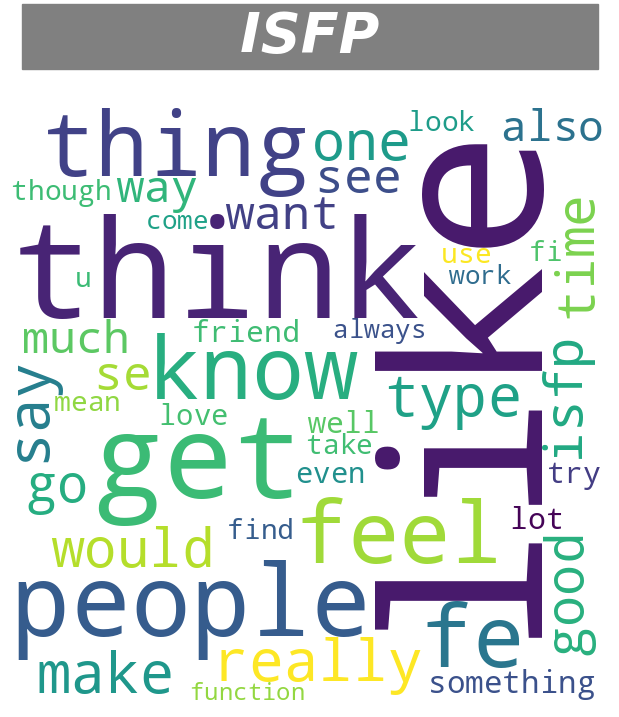

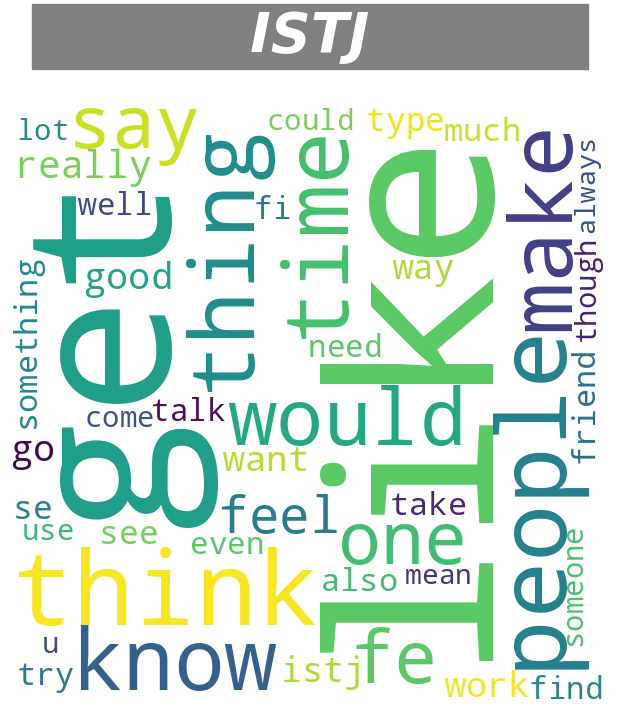

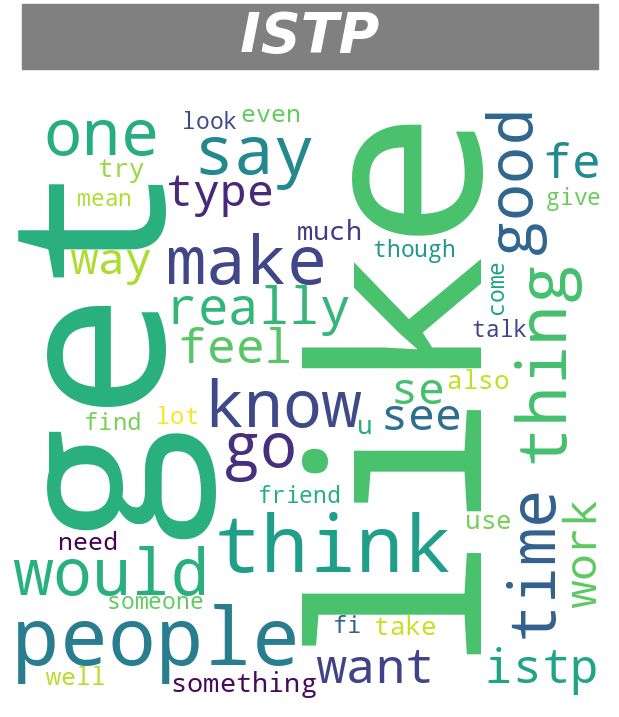

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("Nube de palabras según la personalidad")
print()
print()

for index, row in mbti.iterrows():
  words = {}
  for palabra in palabras:
    words[palabra] = row[palabra]
  wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(words)
  plt.figure(figsize = (6, 6), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(label='           ' + row['personality'] + '           ',
          fontsize=40,
          backgroundcolor='gray',
          color="white",
          fontstyle="italic",
          pad="40.0",
          weight='bold')
  plt.show()
  print()
  print()




Variables para realizar el análisis de componentes principles (n = 2, o sea dos componentes):
['actually' 'also' 'always' 'come' 'could' 'de' 'det' 'en' 'enfj' 'enfp'
 'entj' 'entp' 'er' 'esfj' 'esfp' 'estj' 'estp' 'even' 'fe' 'feel' 'fi'
 'find' 'friend' 'function' 'german' 'germany' 'get' 'give' 'go' 'good'
 'help' 'ikke' 'infj' 'infp' 'interest' 'intj' 'intp' 'isfj' 'isfp' 'istj'
 'istp' 'jeg' 'know' 'life' 'like' 'lol' 'look' 'lot' 'love' 'make' 'mean'
 'much' 'need' 'og' 'one' 'people' 'person' 'pretty' 'really' 'right'
 'say' 'se' 'see' 'seem' 'si' 'someone' 'something' 'still' 'take' 'talk'
 'thank' 'thing' 'think' 'though' 'til' 'time' 'try' 'type' 'u' 'use'
 'want' 'way' 'well' 'work' 'would' 'yeah' 'year']

Coeficientes de las dos componentes
Componente 1:
[-6.93650173e-04  1.14348275e-01  5.17677447e-03  7.95046948e-02
  6.46136502e-02 -2.57479139e-04 -5.78667860e-04  4.06828885e-03
 -1.01778439e-03 -8.27654332e-05 -1.70962375e-03  7.14584460e-03
 -5.76357149e-04 -2.44547256

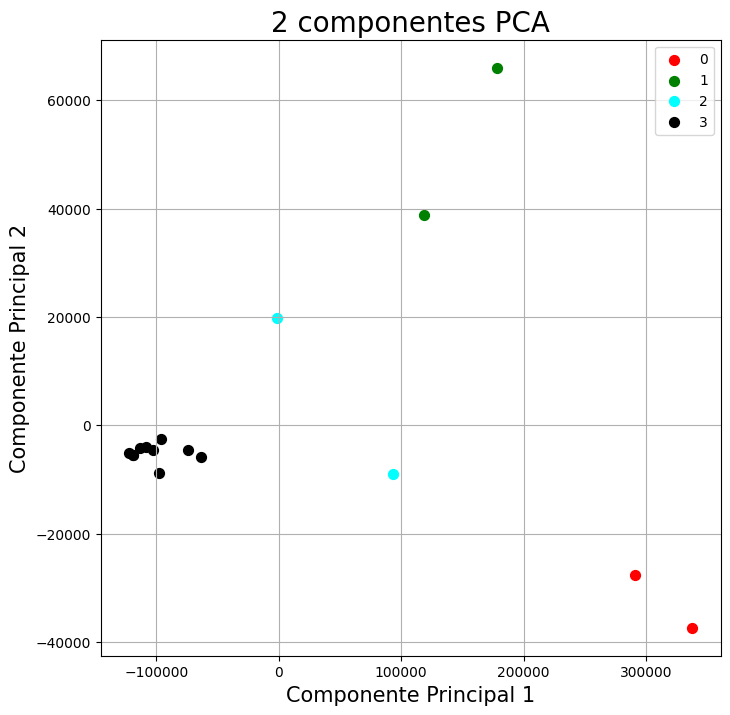

In [52]:
# Agrupamiento por KMEANS
mbti_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')
mbti = mbti_orig.drop(columns=['personality', 'count'])

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

pca = PCA(n_components = 2)

X_train = pca.fit_transform(mbti)

print("Variables para realizar el análisis de componentes principles (n = 2, o sea dos componentes):")
print(pca.feature_names_in_)
print()

print("Coeficientes de las dos componentes")
print("Componente 1:")
print(pca.components_[0])
print("Componente 2:")
print(pca.components_[1])
print()

print("Varianza explicada de cada componente:")
print(pca.explained_variance_ratio_)
print()

pca1 = np.abs(pca.components_[0])
pca1sum = np.sum(pca1)
pca1p = pca1/pca1sum

pca1p_inds = pca1p.argsort()
sorted_pca1p = pca1p[pca1p_inds[::-1]]
sorted_pca1p_label = pca.feature_names_in_[pca1p_inds[::-1]]
comb_pca1p = np.dstack((sorted_pca1p_label, sorted_pca1p))

print("Porcentaje de la influencia de cada variable en la componente 1:")
print(np.array([[f"{i} {j:.2%}"] for i, j in comb_pca1p[0]]))
print()

pca2 = np.abs(pca.components_[1])
pca2sum = np.sum(pca2)
pca2p = pca2/pca2sum

pca2p_inds = pca2p.argsort()
sorted_pca2p = pca2p[pca2p_inds[::-1]]
sorted_pca2p_label = pca.feature_names_in_[pca2p_inds[::-1]]
comb_pca2p = np.dstack((sorted_pca2p_label, sorted_pca2p))

print("Porcentaje de la influencia de cada variable en la componente 2:")
print(np.array([[f"{i} {j:.2%}"] for i, j in comb_pca2p[0]]))
print()


pca2 = np.abs(pca.components_[1])
pca2sum = np.sum(pca2)

km = KMeans(
    n_clusters=4, init='random',
    n_init=12, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(mbti)

principalDf = pd.DataFrame(data = X_train
             , columns = ['Componente Principal 1', 'Componente Principal 2'])
principalDf.insert(loc=0, column='Personalidad', value=mbti_orig['personality'])

print(principalDf)
print()

print("Agrupamiento en 4 clases usando KMeans")
comb_km = np.dstack((mbti_orig['personality'], y_km))
print(comb_km)
print()

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)

targets = [0, 1, 2, 3]
colors = ['red', 'green', 'cyan', 'black']

mbti = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MBTI500.data.enriched.txt', sep='\t')
for target, color in zip(targets,colors):
    indicesToKeep = y_km == target
    ax.scatter(principalDf.loc[indicesToKeep, 'Componente Principal 1']
               , principalDf.loc[indicesToKeep, 'Componente Principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


for i in range(4):
  print('Grupo ' + str(i))
  for j in range(16):
    if (i == y_km[j]):
      print(mbti['personality'][j])
  print()
